# Grid approximation for posterior computation
In this example we will look at the grid approximation for posterior computation in a coin tossing model.

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
num_tails = 6
num_trials = 9
num_points = 20

## Define grid

In [3]:
p_grid = np.linspace(0, 1, num_points)

## Define prior
$p(\theta)$

In [4]:
prior = np.ones(num_points)  # unifiorm
#prior = (p_grid >= 0.5).astype(int)  # truncated
#prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

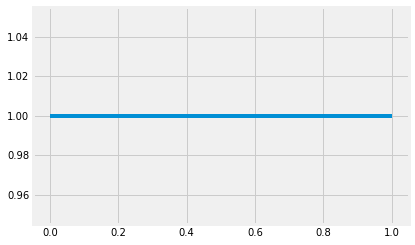

In [5]:
plt.plot(p_grid, prior)
plt.show()

## Compute likelihood at each value in grid
$p(x | \theta) = \binom {n}{k} p^{k}q^{n-k}$

In [6]:
likelihood = st.binom.pmf(num_tails, num_trials, p=p_grid)

## Compute unstandardised posterior - product of likelihood and prior

In [7]:
unstd_posterior = likelihood * prior

## Compute standardised posterior

In [8]:
posterior = unstd_posterior / unstd_posterior.sum()

## Compare grid approximation with the exact result

In [9]:
exact_posterior = st.beta(a = 1 + num_tails, b = num_trials - num_tails + 1).pdf(p_grid) * 1 / num_points

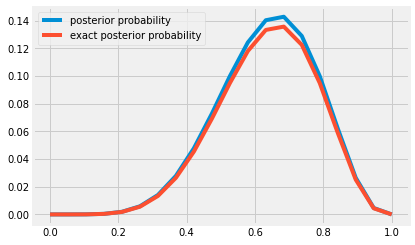

In [10]:
plt.plot(p_grid, posterior, label="posterior probability")
plt.plot(p_grid, exact_posterior, label="exact posterior probability")
plt.legend(loc="upper left")
plt.show()

In [11]:
posterior_pdf = posterior / (posterior * 1 / num_points).sum()

In [12]:
exact_posterior_pdf = st.beta(a = 1 + num_tails, b = num_trials - num_tails + 1).pdf(p_grid)

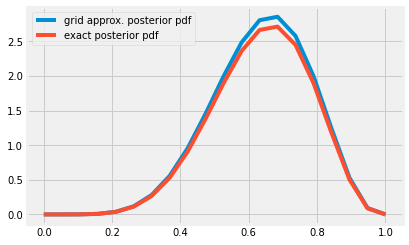

In [13]:
plt.plot(p_grid, posterior_pdf, label="grid approx. posterior pdf")
plt.plot(p_grid, exact_posterior_pdf, label="exact posterior pdf")
plt.legend(loc="upper left")
plt.show()

## Calculate summaries

### Sample from posterior

In [14]:
num_samples = 10000
samples = np.random.choice(p_grid, size=num_samples, replace=True, p=posterior)

### Posterior probability that $p<0.5$

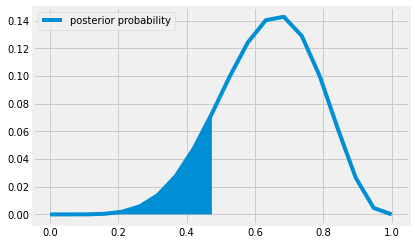

In [15]:
plt.plot(p_grid, posterior, label="posterior probability")
plt.fill_between(p_grid[p_grid < 0.5], 0, posterior[p_grid < 0.5])
plt.legend(loc="upper left")
plt.show()

In [16]:
posterior[p_grid < 0.5].sum()

0.17072394266778282

In [17]:
(samples < 0.5).sum() / num_samples

0.1712

### How much posterior probability lies between 0.5 and 0.75

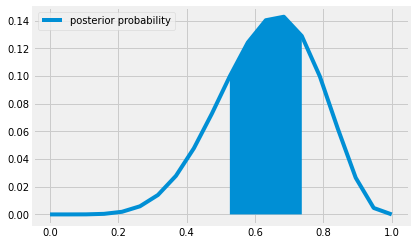

In [18]:
plt.plot(p_grid, posterior, label="posterior probability")
plt.fill_between(p_grid[np.logical_and(p_grid > 0.5,  p_grid < 0.75)], 0, posterior[np.logical_and(p_grid > 0.5,  p_grid < 0.75)])
plt.legend(loc="upper left")
plt.show()

In [19]:
posterior[np.logical_and(p_grid > 0.5,  p_grid < 0.75)].sum()

0.6362297548309495

In [20]:
(np.logical_and(samples > 0.5,  samples < 0.75)).sum() / num_samples

0.6347

## Posterior predictive distribution
Can be interpreted as the "weighted average of the predictive distributions for each possible parameter value"

### Grid approximation

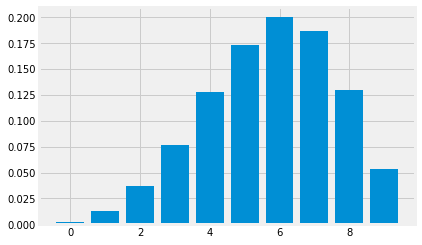

In [21]:
prob = (np.array([np.histogram(st.binom.rvs(9, p_grid[i], size=(10000)), bins=10, range=(0,10))[0] / 10000 for i in range(len(posterior))]).T * posterior).sum(axis=1)
plt.bar(range(0,10), prob);

### Exact

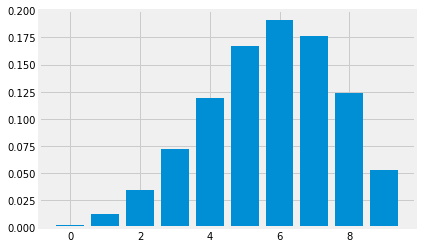

In [22]:
prob = (np.array([np.histogram(st.binom.rvs(9, p_grid[i], size=(10000)), bins=10, range=(0,10))[0] / 10000 for i in range(len(exact_posterior))]).T * exact_posterior).sum(axis=1)
plt.bar(range(0,10), prob);